# GC-MS data exploration
Author: Michal Stary

This notebook consist of skectch of GCMS data exploration. 

In [5]:
with open("/storage/brno1-cerit/projects/msml/data/MoNA-export-GC-MS_Spectra.msp") as f:
    lines= f.readlines()


## InChi stats

In [60]:
import numpy as np
from collections import Counter
c_lines = [line.split()[1] for line in lines if line[:8] == "InChIKey"]
cntr = Counter(c_lines)

#np.mean(cntr.elements())
cntr.most_common()[:100]

[('BTJIUGUIPKRLHP-UHFFFAOYSA-N', 49),
 ('DTGKSKDOIYIVQL-QXFUBDJGSA-N', 35),
 ('UFWIBTONFRDIAS-UHFFFAOYSA-N', 29),
 ('KYZHGEFMXZOSJN-UHFFFAOYSA-N', 26),
 ('SESFRYSPDFLNCH-UHFFFAOYSA-N', 23),
 ('WTEVQBCEXWBHNA-YFHOEESVSA-N', 22),
 ('WTEVQBCEXWBHNA-JXMROGBWSA-N', 21),
 ('ZUOUZKKEUPVFJK-UHFFFAOYSA-N', 20),
 ('XYIBRDXRRQCHLP-UHFFFAOYSA-N', 20),
 ('WQZGKKKJIJFFOK-PHYPRBDBSA-N', 20),
 ('MTZQAGJQAFMTAQ-UHFFFAOYSA-N', 18),
 ('HSHNITRMYYLLCV-UHFFFAOYSA-N', 18),
 ('QCDWFXQBSFUVSP-UHFFFAOYSA-N', 18),
 ('DHMQDGOQFOQNFH-UHFFFAOYSA-N', 18),
 ('WQZGKKKJIJFFOK-SXUWKVJYSA-N', 18),
 ('QPJVMBTYPHYUOC-UHFFFAOYSA-N', 17),
 ('ZSIAUFGUXNUGDI-UHFFFAOYSA-N', 17),
 ('CHLICZRVGGXEOD-UHFFFAOYSA-N', 17),
 ('BBMCTIGTTCKYKF-UHFFFAOYSA-N', 16),
 ('OLNJUISKUQQNIM-UHFFFAOYSA-N', 16),
 ('GJRQTCIYDGXPES-UHFFFAOYSA-N', 16),
 ('KWOLFJPFCHCOCG-UHFFFAOYSA-N', 16),
 ('UDSFAEKRVUSQDD-UHFFFAOYSA-N', 16),
 ('RGHHSNMVTDWUBI-UHFFFAOYSA-N', 16),
 ('DULCUDSUACXJJC-UHFFFAOYSA-N', 16),
 ('ADIMAYPTOBDMTL-UHFFFAOYSA-N', 16),
 ('DCXYFEDJO

In [186]:
np.mean(list(cntr.values()))

1.9164130655305336

## Instrument

In [28]:
c_lines = [line.split()[1] for line in lines if line[:len("Instrument_type")] == "Instrument_type"]
cntr = Counter(c_lines)

#np.mean(cntr.elements())
cntr.most_common()[:100]

[('EI-B', 13797),
 ('GC-EI-TOF', 2775),
 ('CI-B', 992),
 ('GC-MS', 918),
 ('GC-APCI-QTOF', 94),
 ('GC-EI-Q', 64),
 ('GC-EI-QqQMS', 25),
 ('GC-EI-QQ', 19),
 ('GC-FI-TOF', 6),
 ('GC-MS-EI', 2),
 ('GC', 1),
 ('single', 1)]

## Exact mass

<AxesSubplot:>

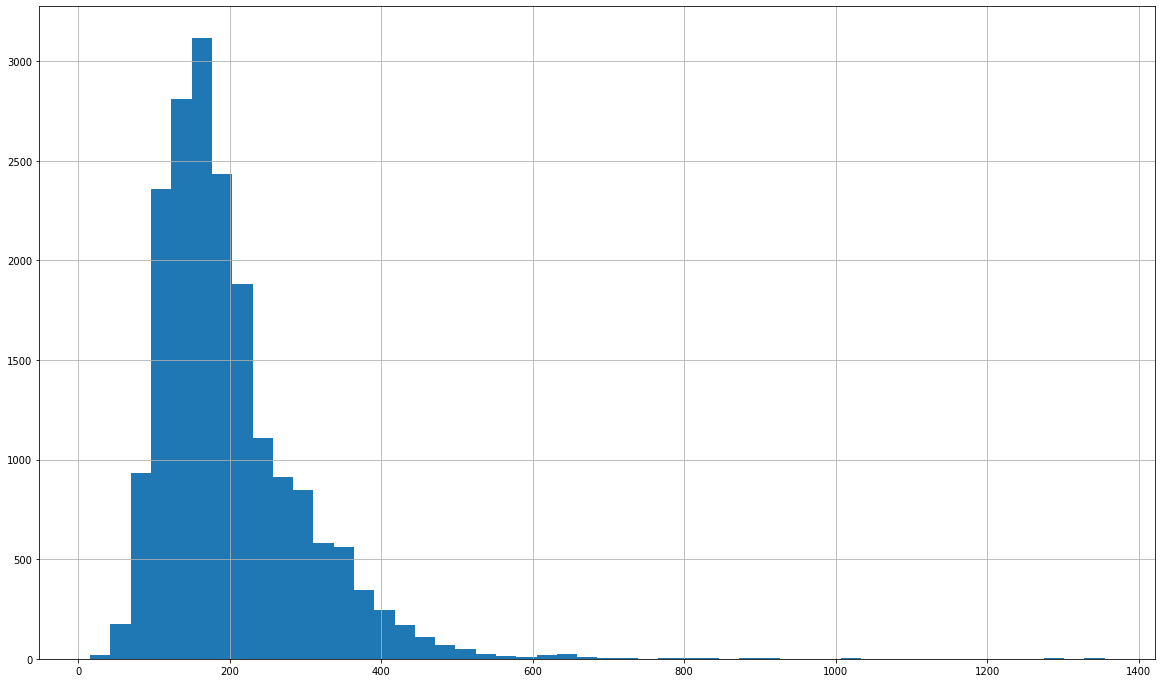

In [20]:
c_lines = [line.split()[1].split(".")[0] for line in lines if line[:len("ExactMass")] == "ExactMass"]
#cntr = Counter(c_lines)

#np.mean(cntr.elements())
#cntr.most_common()[:100]
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

c_lines = pd.Series(np.array(c_lines, dtype=int))

plt.figure(figsize=(20,12))
#sns.countplot(c_lines)
#plt.xticks(np.arange(min(c_lines), max(c_lines), 10))
#None
c_lines.hist(bins=50)

## Variance within same Inchi

In [2]:
from matchms.filtering import add_losses
from matchms.filtering import add_parent_mass
from matchms.filtering import default_filters
from matchms.filtering import normalize_intensities
from matchms.filtering import reduce_to_number_of_peaks
from matchms.filtering import require_minimum_number_of_peaks
from matchms.filtering import select_by_mz
from matchms.importing import load_from_msp
from spec2vec import SpectrumDocument


In [89]:
def spectrum_processing(s, min_rel_int=None):
    """This is how one would typically design a desired pre- and post-
    processing pipeline."""
    s = default_filters(s)
    #s = add_parent_mass(s)
    #s = reduce_to_number_of_peaks(s, n_required=10, ratio_desired=0.5, n_max=500)
    s = select_by_mz(s, mz_from=0, mz_to=1000);
    #s = add_losses(s, loss_mz_from=10.0, loss_mz_to=200.0)
    s = normalize_intensities(s)

    s = require_minimum_number_of_peaks(s, n_required=10)
    
    if min_rel_int is not None:
        s= select_by_relative_intensity(s, intensity_from=min_rel_int)


    return s

In [90]:
%%capture
spectrums = [spectrum_processing(s) for s in load_from_msp("data/MoNA-export-GC-MS_Spectra.msp")];
# Omit spectrums that didn't qualify for analysis
spectrums = [s for s in spectrums if s is not None and "inchikey" in s.metadata]

In [91]:
dic = dict()
for i, inchi in enumerate(map(lambda doc: doc.metadata["inchikey"], spectrums)):
    dic[inchi] = dic.get(inchi, []) + [i] 

In [92]:
lst = sorted(dic, key=lambda x: len(dic[x]), reverse=True)

for key in lst[:10]:
    print(key, dic[key])

BTJIUGUIPKRLHP-UHFFFAOYSA-N [190, 198, 2665, 7401, 8646, 9812, 13327, 14902, 14903, 14904, 14905, 14906, 14907, 14908, 14909, 14910, 14911, 14912, 14913, 14914, 14915, 14916, 14917, 14918, 14919, 14920, 14921, 14922, 17850, 17851, 17852, 17853, 17854, 17855, 17856, 17857, 17858, 17859, 17860, 17861, 17862, 17863, 17864, 17865, 17866, 17867, 17868, 17869, 17870]
DTGKSKDOIYIVQL-QXFUBDJGSA-N [498, 3664, 6169, 6849, 7132, 16956, 16957, 16958, 16959, 16960, 16961, 16962, 16963, 16964, 16965, 16966, 16967, 16968, 16969, 16970, 17081, 17082, 17083, 17084, 17085, 17086, 17087, 17088, 17089, 17090, 17091, 17092, 17093, 17094, 17095]
KYZHGEFMXZOSJN-UHFFFAOYSA-N [39, 40, 272, 273, 4426, 4645, 5255, 5309, 7631, 7632, 8840, 8910, 17482, 17483, 17484, 17485, 17486, 17487, 17488, 17489, 17490, 17491, 17492, 17493]
SESFRYSPDFLNCH-UHFFFAOYSA-N [1326, 2866, 4854, 5014, 5257, 5311, 5562, 6791, 7640, 8845, 10113, 15498, 15499, 15500, 15501, 15502, 15503, 15504, 15505, 15506, 15507, 15508, 18115]
UFWIBTONF

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.color_palette("tab10")

def show_same(i, k):
    spectrums[dic[lst[i]][0]].plot()
    spectrums[dic[lst[i]][-1]].plot()

    plt.show()
    for k in range(0,k):
        #plt.figure(figsize=(20,10))
        for s_ind in dic[lst[i]]:
            ins = spectrums[s_ind].peaks.intensities
            mz = spectrums[s_ind].peaks.mz
            kth = np.argsort(ins)[::-1][k:k+1]
            sns.scatterplot(x=mz[kth], y=ins[kth], s=200, alpha=.5)
        plt.title(f"Situation at {k+1}.th peak")
        plt.show()
    for k in range(25,25+k):
        #plt.figure(figsize=(20,10))
        for s_ind in dic[lst[i]]:
            ins = spectrums[s_ind].peaks.intensities
            mz = spectrums[s_ind].peaks.mz
            kth = np.argsort(ins)[::-1][k:k+1]
            sns.scatterplot(x=mz[kth], y=ins[kth], s=200, alpha=.5)
        plt.title(f"Situation at {k+1}.th peak")
        plt.show()
        
        

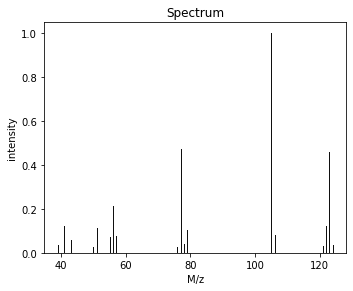

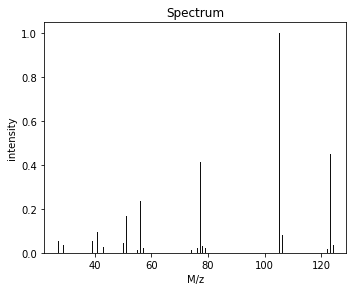

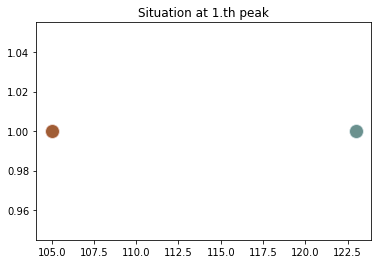

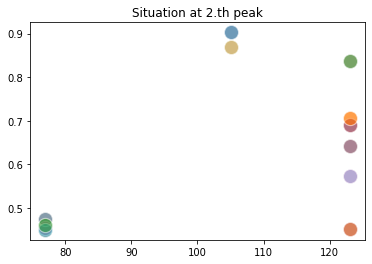

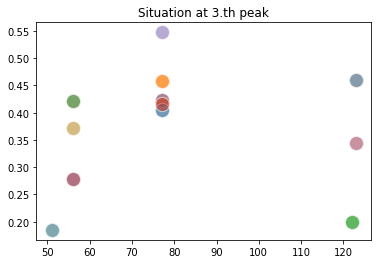

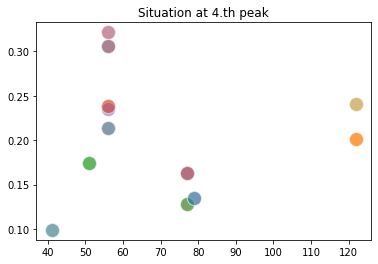

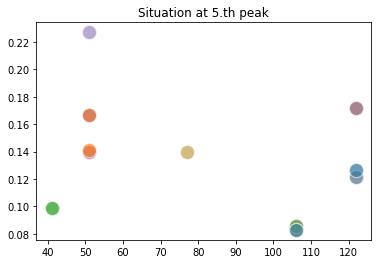

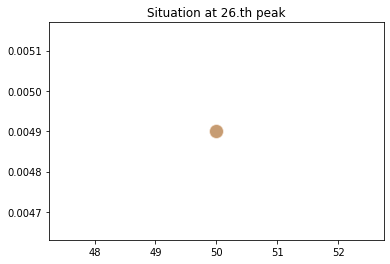

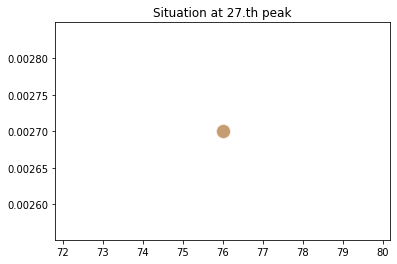

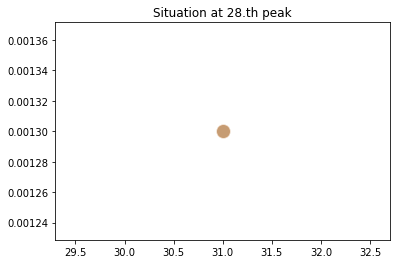

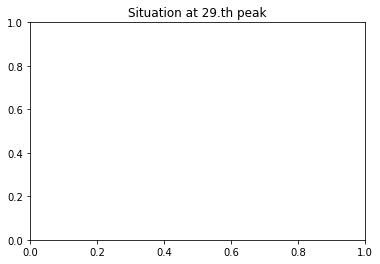

In [122]:
show_same(2,5)

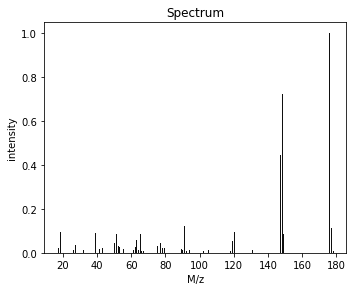

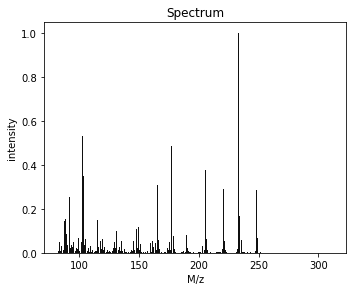

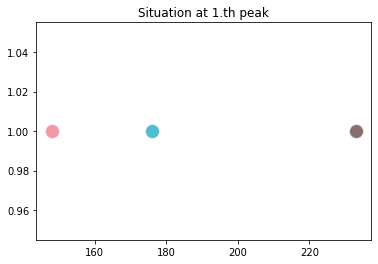

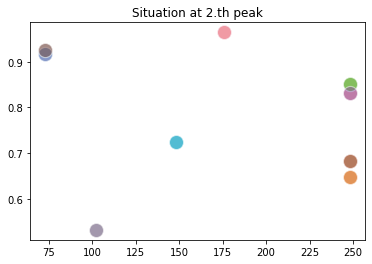

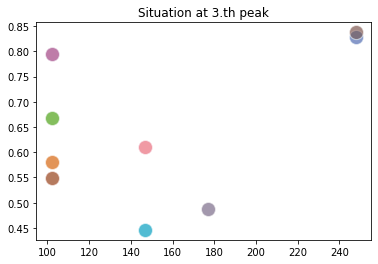

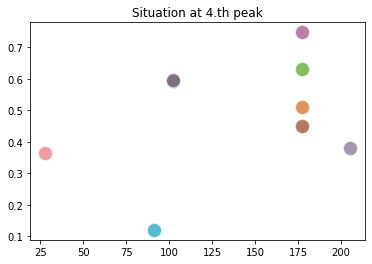

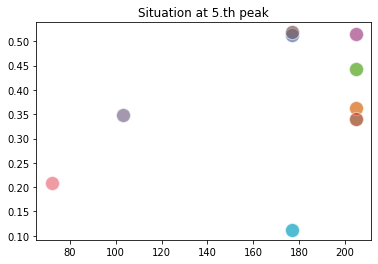

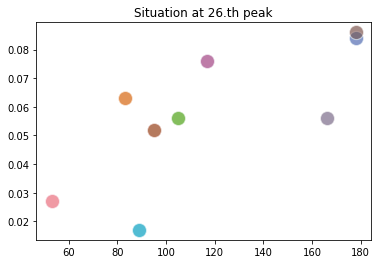

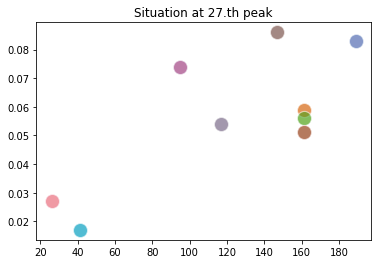

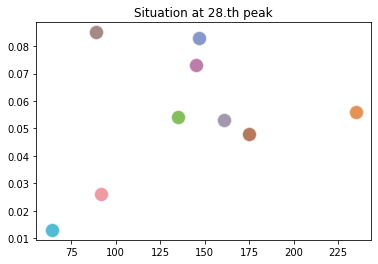

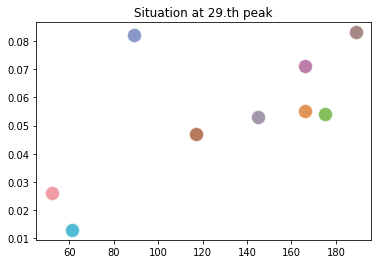

In [123]:
show_same(9,5)

## Variance within the intensities on the most common peaks

In [129]:
# Create spectrum documents

reference_documents = [SpectrumDocument(s, n_decimals=0) for s in spectrums]

In [136]:
from collections import Counter
def get_occurence(docs):
    all_ = []
    for i in range(len(docs)):
        all_ += [*map(lambda p: int(p.split("@")[1]), docs[i].words)]
    return all_, Counter(all_)
all_, occurences = get_occurence(reference_documents)
locations, counts = np.array(sorted(zip(occurences.keys(), occurences.values() ), key=lambda x: x[0])).T
occurences.most_common(10),  min(all_), max(all_)

([(43, 9397),
  (91, 9209),
  (41, 8804),
  (55, 8667),
  (105, 8609),
  (85, 8550),
  (77, 8164),
  (39, 7971),
  (115, 7916),
  (93, 7720)],
 1,
 1000)

In [162]:
# peaks to intensities
def get_peak_ints(docs):
    p_to_ints = [[] for _ in range(1001)]
    for d in docs:
        for p, i in zip(d.words, d.weights):
            p = int(p.split("@")[1])
            p_to_ints[p] += [i]
            
    return p_to_ints

p_to_ints = get_peak_ints(reference_documents)

43 9397


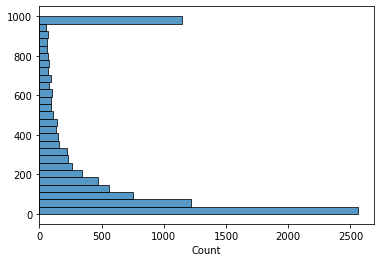

91 9209


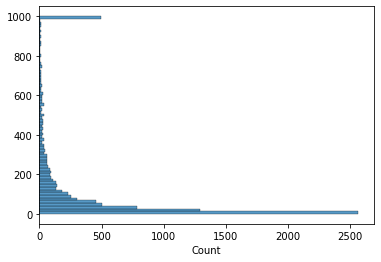

41 8804


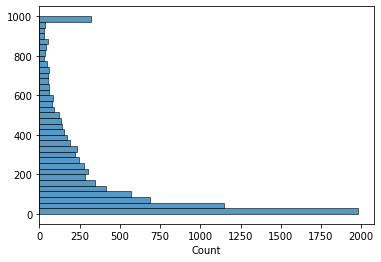

55 8667


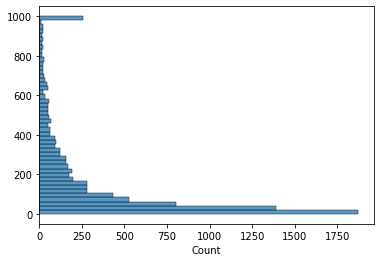

105 8609


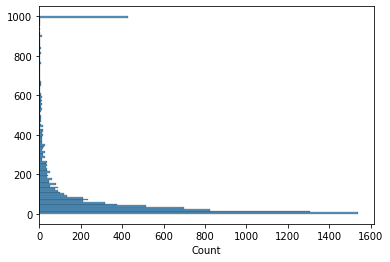

85 8550


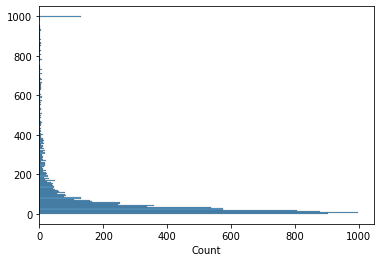

77 8164


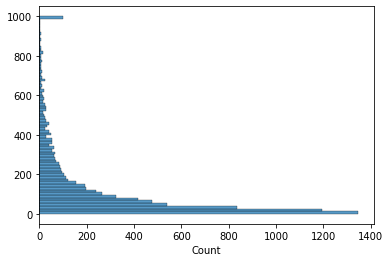

39 7971


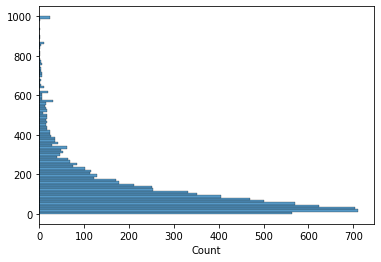

115 7916


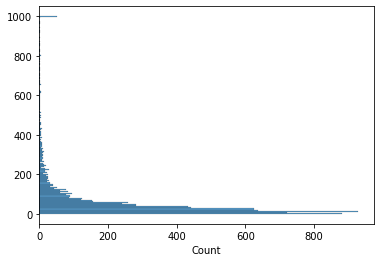

93 7720


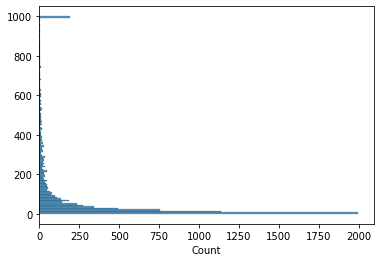

89 7689


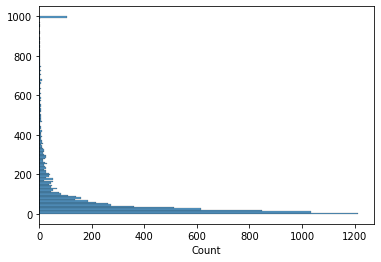

95 7544


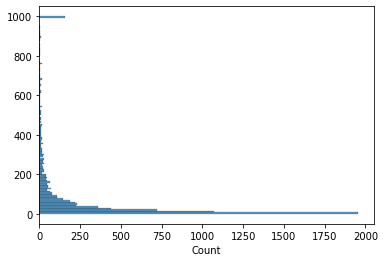

103 7540


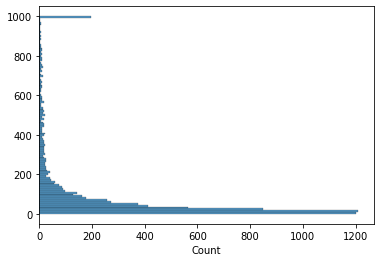

42 7463


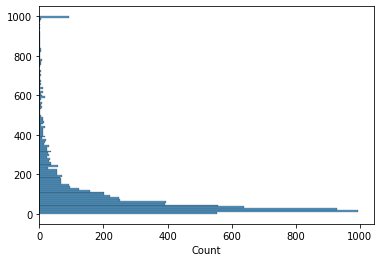

97 7452


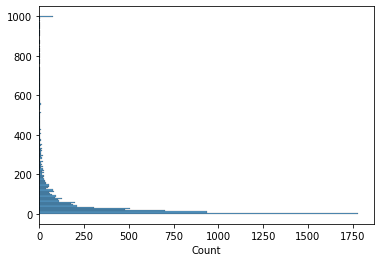

99 7391


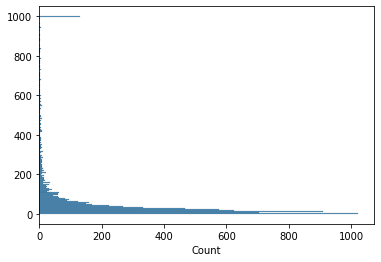

57 7387


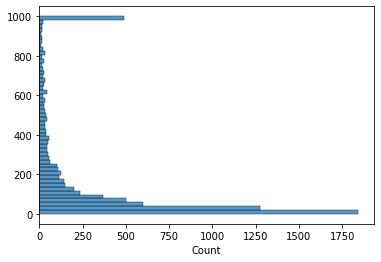

119 7337


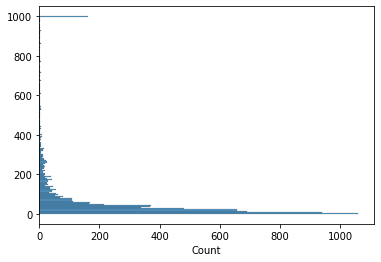

69 7203


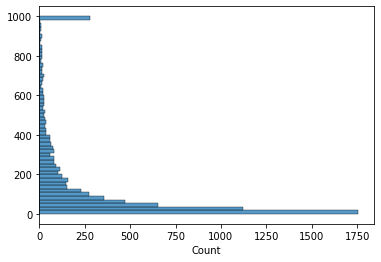

87 7186


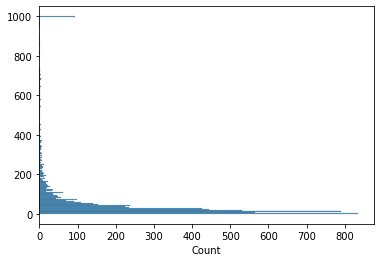

In [185]:
for p, c in occurences.most_common(20):
    print(p,c)
    sns.histplot(y=(np.array(p_to_ints[p])*1000).astype(int))
    plt.show()

## Quickcheck instrument order changes

In [8]:
c_lines = [line.split()[1] for line in lines if line[:len("Instrument_type")] == "Instrument_type"]
o = None
c = 0
for ins in c_lines:
    if ins!= o:
        print(o, c)
        o = ins
        c = 1
    else:
        c+=1

None 0
EI-B 139
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 912
CI-B 9
EI-B 4
CI-B 1
EI-B 453
CI-B 2
EI-B 1
CI-B 1
EI-B 1
CI-B 2
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 2
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 2
EI-B 18
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 2
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 2
CI-B 1
EI-B 869
CI-B 3
EI-B 426
CI-B 44
EI-B 76
CI-B 1
EI-B 458
CI-B 53
EI-B 153
CI-B 8
EI-B 550
CI-B 1
EI-B 1
CI-B 2
EI-B 3
CI-B 1
EI-B 2
CI-B 1
EI-B 6
CI-B 1
EI-B 37
CI-B 1
EI-B 1
CI-B 2
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 2
CI-B 4
EI-B 241
CI-B 2
EI-B 1
CI-B 1
EI-B 1
CI-B 1
EI-B 285
CI-B 42
EI-B 6
CI-B 1
EI-B 292
CI-B 12
EI-B 23
CI-B 2
EI-B 1
CI-B 2
EI-B 1
CI-B 2
EI-B 1
CI-B 2
EI-B 146
CI-B 13
EI-B 141